In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

from scipy.io import wavfile as wf

In [2]:
%cd "C://Users//TRETEC//Documents//MVA//S1//[IPGM] Introduction to probabilistic graphical models//Projet//independent_component_analysis"
from mva_independent_component_analysis.utils.preprocessing import centering_and_whitening
from mva_independent_component_analysis.fast_ica.fastica_numpy import fast_ica
from mva_independent_component_analysis.utils.mix_sources import mix_sources
%cd experiments

c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis
C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
s1_file = "data/chopin-fantaisie-impromptu-op.wav"
s2_file = "data/scorch-fire.wav"

In [4]:
sampling_rate_1, s1 = wf.read(s1_file)
s1 = s1[:,0]

sampling_rate_2, s2 = wf.read(s2_file)
s2 = s2[:,0]
print(s1.shape, s2.shape)

(12390918,) (1554726,)


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_25620\1700381029.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_1, s1 = wf.read(s1_file)
C:\Users\TRETEC\AppData\Local\Temp\ipykernel_25620\1700381029.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_2, s2 = wf.read(s2_file)


In [14]:
S=[s1, s2]
S, X, Xw = mix_sources(S, normalise=False)
wf.write('./sound_mixture.wav', sampling_rate_2, X.mean(axis=0).astype(np.float32))

In [10]:
W = fast_ica(Xw, 1, 1e-8, 5000) #Nour's method.

component 0
iteration : 0 : distance 0.24243569374084473
iteration : 1 : distance 0.004627525806427002
iteration : 2 : distance 0.0
component 1
iteration : 0 : distance 0.936750128865242
iteration : 1 : distance 0.0


In [11]:
unMixed = np.dot(W,Xw)


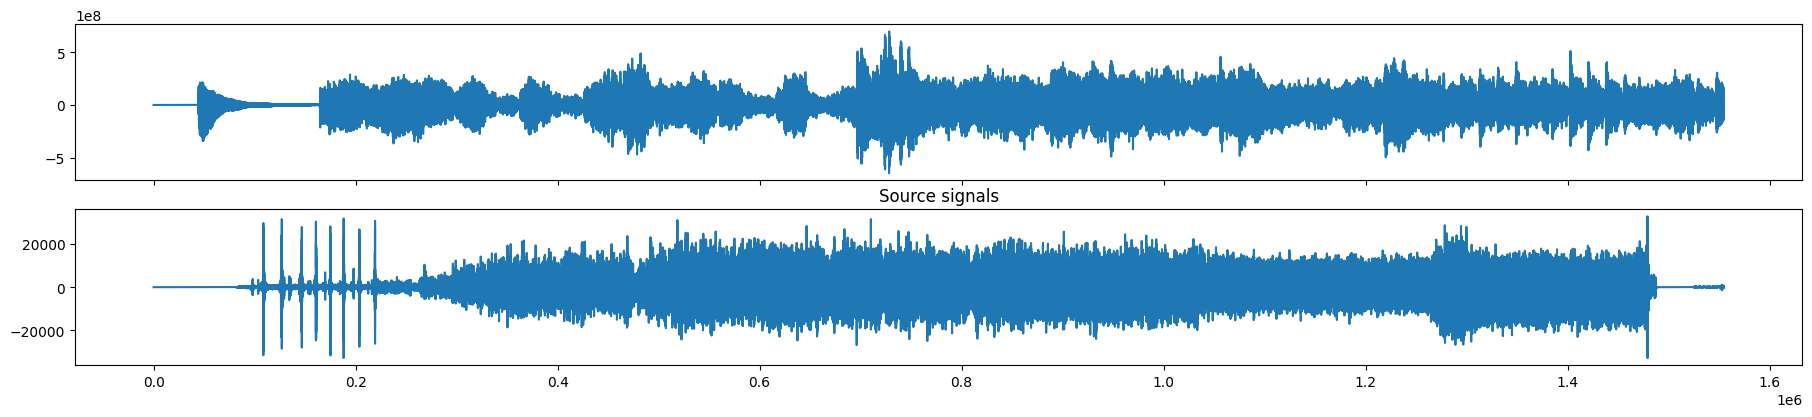

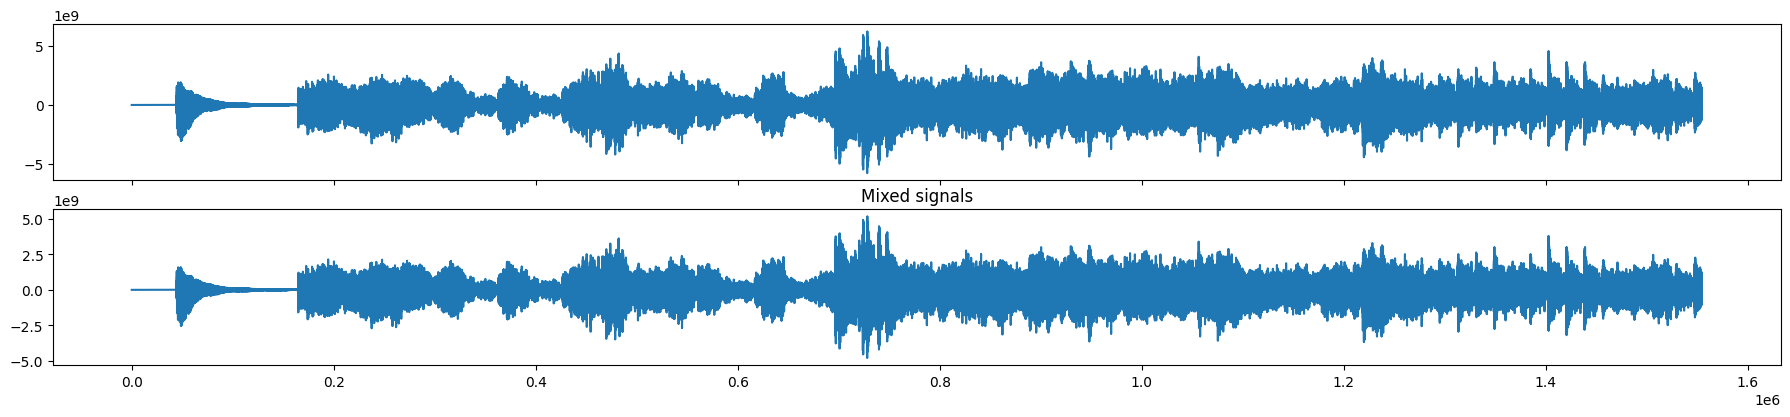

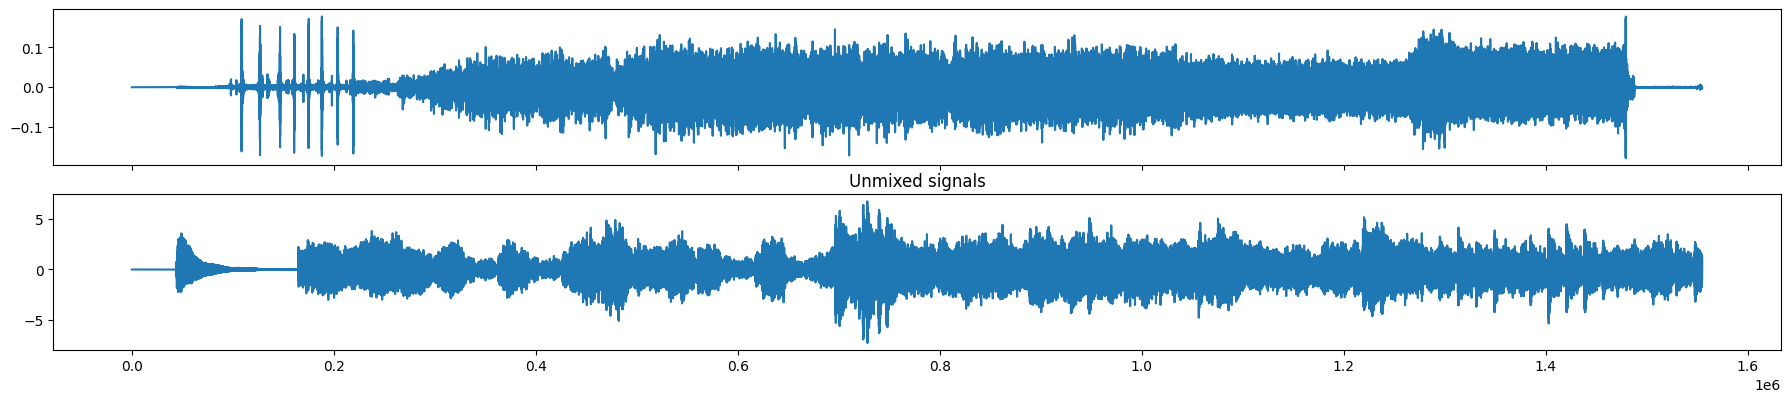

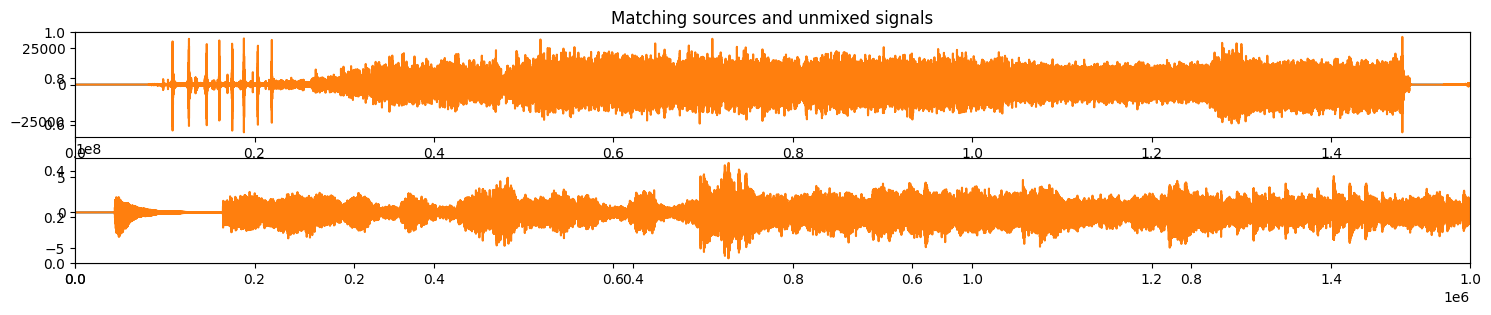

In [17]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[1].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[1].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[1].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)

plt.figure(figsize=(18,3))
plt.title("Matching sources and unmixed signals")
for i in range(X.shape[0]):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    plt.subplot(n_signals,1,i+1)
    plt.plot(unMixed[i,:].T)
    plt.plot(S[perm].T)
    plt.xlim(0, S.shape[1])
    # ax.set_ylim(-1.5, 1.5)

In [13]:
wf.write('inference/s1_predicted.wav', sampling_rate_2, unMixed[0].astype(np.float32))
wf.write('inference/s2_predicted.wav', sampling_rate_2, unMixed[1].astype(np.float32))